NAG finished training
RMSProp finished training
AdaDelta finished training
Adam finished training


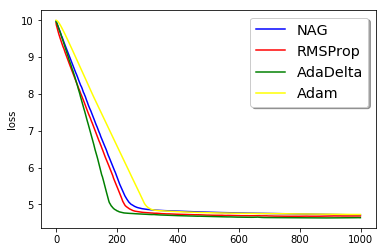

In [1]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import math
from math import exp,log
from random import randint
import random

x_train,y_train=ds.load_svmlight_file("a9a.txt")#read data
x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))#add bis to x
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_test,y_test=ds.load_svmlight_file("a9a.t",n_features=123)#read data
x_test=x_test.toarray()
x_test=np.hstack((x_test,np.ones([np.shape(x_test)[0],1])))#add bis to x
y_test=y_test.reshape(np.shape(y_test)[0],1)

n=np.shape(x_train)[0]
m=np.shape(x_train)[1]

#loss function
def loss(X,Y,W,C):
    l=0
    n,m=np.shape(X)
    for i in range(n):
        l+=max(0,1-Y[i]*W.T.dot(X[i]))
    l/=n
    l*=C
    l+=(W.T.dot(W)/2)[0][0]
    return l

#gradient function
def gradient(X,Y,W,C):
    g=np.zeros(np.shape(W))
    m,n=np.shape(X)
    M=np.zeros((m,1))
    for i in range(m):
        if 1-Y[i]*(W.T.dot(X[i]))>=0:
            M[i][0]=1
    Y=M*Y
    g=W-C*X.T.dot(Y)
    return g

def NAG():
    #initialize parameters with zero
    W=np.zeros((m,1))
    loss_NAG=[]
    #set parameter
    eta=1e-6
    gamma=1e-5
    batch=100
    C=10

    v=0
    for epoch in range(1000):
        #calculate gradient g from partial samples
        random.seed()
        i=randint(0,n-1-batch)
        g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W-gamma*v,C)
        v=gamma*v+eta*g
        W=W-v
        l_test=loss(x_test,y_test,W,C)
        loss_NAG.append(l_test)
    print('NAG finished training')
    plt.plot(loss_NAG,color='blue',label='NAG')

def RMSProp():
    #initialize parameters with zero
    W=np.zeros((m,1))
    loss_RMSProp=[]
    #set parameter
    eta=0.0003
    gamma=0.9
    eps=1e-6
    batch=100
    C=10

    G=0
    for epoch in range(1000):
        #calculate gradient g from partial samples
        random.seed()
        i=randint(0,n-1-batch)
        g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
        G=gamma*G+(1-gamma)*(g*g)
        W=W-eta/np.sqrt(G+eps)*g
        l_test=loss(x_test,y_test,W,C)
        loss_RMSProp.append(l_test)
    print('RMSProp finished training')
    plt.plot(loss_RMSProp,color='red',label='RMSProp')

def AdaDelta():
    #initialize parameters with zero
    W=np.zeros((m,1))
    loss_AdaDelta=[]
    #set parameter
    gamma=0.9
    eps=1e-8
    batch=100
    C=10

    G=0
    dt=0
    for epoch in range(1000):
        #calculate gradient g from partial samples
        random.seed()
        i=randint(0,n-1-batch)
        g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
        G=gamma*G+(1-gamma)*g*g
        dw=-np.sqrt(dt+eps)/np.sqrt(G+eps)*g
        W=W+dw
        dt=gamma*dt+(1-gamma)*dw*dw
        l_test=loss(x_test,y_test,W,C)
        loss_AdaDelta.append(l_test)
    print('AdaDelta finished training')
    plt.plot(loss_AdaDelta,color='green',label='AdaDelta')

def Adam():
    #initialize parameters with zero
    W=np.zeros((m,1))
    loss_Adam=[]
    #set parameter
    beta=0.9
    gamma=0.99999
    eta=0.000025
    eps=1e-8
    batch=100
    C=10

    M=0
    G=0
    for epoch in range(1000):
        #calculate gradient g from partial samples
        i=randint(0,n-1-batch)
        g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
        M=beta*M+(1-beta)*g
        G=gamma*G+(1-gamma)*g*g
        alpha=eta*np.sqrt(1-math.pow(gamma,epoch))/(1-beta)
        W=W-alpha*M/np.sqrt(G+eps)
        l_test=loss(x_test,y_test,W,C)
        loss_Adam.append(l_test)
    print('Adam finished training')
    plt.plot(loss_Adam,color='yellow',label='Adam')

#draw
plt.ylabel("loss")
NAG()
RMSProp()
AdaDelta()
Adam()
plt.legend(loc='upper right',shadow=True,fontsize='x-large')
plt.show()
